<center>Учреждение образования</center>
<center>«Белорусский государственный университет информатики и радиоэлектроники»</center>
<br><br>
<center>Кафедра информатики</center>
<br><br><br><br><br><br><br><br><br><br>
<center>Лабораторная работа №6</center>
<center>Кластеризация</center>
<br><br><br><br><br><br><br><br>

<p style='text-align: right;'>
Выполнил:
Полевой Александр Вадимович <br>
магистрант кафедры информатики <br>      
группа № 858641	
<br><br><br><br>
Проверил:     Стержанов Максим Валерьевич
</p>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<center>
Минск 2019
</center>


Набор данных ex6data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - координаты точек, которые необходимо кластеризовать.

**1. Загрузите данные ex6data1.mat из файла.**

In [27]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random
from mlxtend.plotting import category_scatter
import imageio
from sklearn.cluster import AgglomerativeClustering

data1 = scipy.io.loadmat('data/ex6data1.mat')
X1 = data1['X']
X1.shape

(50, 2)

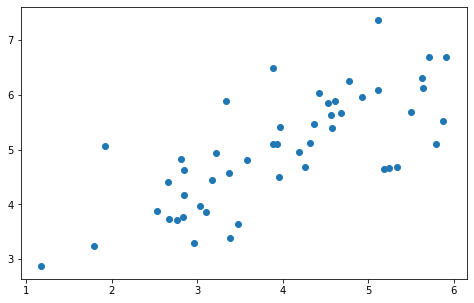

In [28]:
fig = plt.figure(figsize=(8,5))
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

**2. Реализуйте функцию случайной инициализации K центров кластеров.**

In [29]:
def rand_init_centroids(X, K):
    indexes = random.sample(range(0, len(X)), K)

    return X[indexes]

In [30]:
rand_init_centroids(X1, 3)

array([[3.03354125, 3.97879278],
       [5.70732809, 6.68103995],
       [3.95524687, 4.5053271 ]])

**3. Реализуйте функцию определения принадлежности к кластерам.**

In [31]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum(np.square((p1 - p2))))

In [32]:
euclidean_distance(np.array([2, 1]), np.array([2, 3]))

2.0

In [33]:
def assign_clusters(X, centroids):
    m = len(X)
    
    c = np.zeros([m, 1]).astype(int)
    
    for x_i in range(m):
        x = X[x_i]
        x_distance = 100000 # инициализируем большим занчением
        
        for c_i in range(len(centroids)):
            centroid = centroids[c_i]
            dist = euclidean_distance(x, centroid)
            
            if dist < x_distance:
                x_distance = dist
                c[x_i] = int(c_i)
    
    return c

In [34]:
c = assign_clusters(X1, rand_init_centroids(X1, 2))
c.shape

(50, 1)

**4. Реализуйте функцию пересчета центров кластеров.**

In [35]:
def split_data_by_clusters(X, clusters):
    m = len(X)
    cluster_indexes = np.unique(clusters)
    
    cluster_values = []
    
    for c_index in cluster_indexes:
        # получаем все значения для центроида c_index
        values = np.array([X[i] for i in range(m) if clusters[i] == c_index]) 
        cluster_values.append(values)
    
    
    
    return cluster_values

In [36]:
def move_centroids(X, clusters):
    cluster_valaues = split_data_by_clusters(X, clusters)
    return np.array([np.mean(c_vals, axis=0) for c_vals in cluster_valaues])

In [37]:
move_centroids(X1, c)

array([[3.41945135, 4.40467055],
       [5.00226783, 6.06615749]])

**5. Реализуйте алгоритм K-средних.**

In [38]:
def k_means(X, K, max_iter = 10):
    centroids = rand_init_centroids(X, K)
    centroids_history = [centroids]
    clusters = np.zeros([len(X), 1])

    for i in range(max_iter):
        clusters = assign_clusters(X, centroids)
        centroids = move_centroids(X, clusters)
        centroids_history.append(centroids)
    
    return centroids, clusters, np.array(centroids_history)

In [39]:
def k_mean_cost(X, clusters, centroids):
    m = len(clusters)
    
    sum = 0
    for i in range(len(X)):
        sum += euclidean_distance(X[i], centroids[int(clusters[i])])
    
    return sum / m

In [40]:
def best_k_means(X, K, max_iter = 10, tries = 100):
    best_cost = 1000000
    best_centr = None
    best_cluster = None
    best_centr_hist = None
    best_iteration = 0
    
    for i in range(tries):
        centr, clust, centr_hist = k_means(X, K, max_iter)
        cost = k_mean_cost(X, clust, centr)
        if cost < best_cost:
            best_cost = cost
            best_centr = centr
            best_cluster = clust
            best_centr_hist = centr_hist
            best_iteration = i
    
    print(f'Best score: {best_cost} is on {best_iteration} iteration.')
    
    return best_centr, best_cluster, best_centr_hist

**6. Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), а также траекторию движения центров кластеров в процессе работы алгоритма**

In [41]:
centr, clust, centr_hist = best_k_means(X1, 3, 20)
X1_mod = np.hstack([X1, clust])

Best score: 0.6685613604551582 is on 2 iteration.


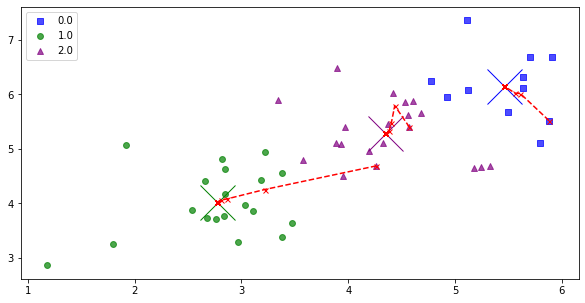

In [42]:
colors = ['blue', 'green','purple', 'gray', 'cyan']
fig = category_scatter(x=0, y=1, label_col=2, data=X1_mod, markersize=35, colors=colors, markers='so^v')
fig.set_size_inches(10, 5)

for i in range(len(centr)):
    cntrid = centr[i]
    plt.plot(cntrid[0], cntrid[1], 'x', markersize=35, c=colors[i])
    plt.plot(centr_hist[:,i,0], centr_hist[:,i,1], 'rx--', markersize=5)

**7. Загрузите данные bird_small.mat из файла.**

In [17]:
bird_data = scipy.io.loadmat('data/bird_small.mat')
Xb = bird_data['A']
Xb.shape

(128, 128, 3)

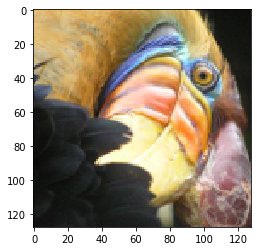

In [18]:
plt.imshow(Xb)

**8. С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.**

In [44]:
bird_k = 16

In [45]:
bird_centr, bird_clust, _ = best_k_means(Xb.reshape(-1, 3), bird_k, 20, 10)

Best score: 18.907338238428 is on 5 iteration.


**9. Насколько уменьшился размер изображения? Как это сказалось на качестве?**

In [46]:
xb_size = Xb.size
compressed_size = bird_centr.size + bird_clust.size
size_diff = compressed_size / xb_size

print(f'Default image size = {Xb.shape[0]} x {Xb.shape[1]} x {Xb.shape[2]} = {xb_size}')
print(f'Compressed image size = {bird_centr.shape[0]} x {bird_centr.shape[1]} + {bird_clust.shape[0]} = {compressed_size}')
print(f'Diff = {size_diff:f}')

Default image size = 128 x 128 x 3 = 49152
Compressed image size = 16 x 3 + 16384 = 16432
Diff = 0.334310


In [47]:
def reconstruct_image(clusters, centroids):
    pixels_count = clusters.shape[0]
    image = np.zeros([pixels_count, centroids.shape[1]]).astype(int)
    
    for i in range(pixels_count):
        image[i] = centroids[int(clusters[i])]
    
    return image

In [48]:
restored_bird_img = reconstruct_image(bird_clust, bird_centr).reshape(128, 128, 3)

In [49]:
restored_bird_img.shape

(128, 128, 3)

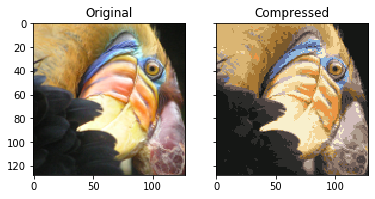

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('Original')
ax1.imshow(Xb)
ax2.set_title('Compressed')
ax2.imshow(restored_bird_img)

In [54]:
img2 = imageio.imread('data/firefox-128.jpg')

In [55]:
img2.shape

(128, 128, 3)

In [56]:
img2_centroids, img2_clusters, _ = best_k_means(img2.reshape(-1, 3), bird_k, 5, 5)

Best score: 24.9942239348656 is on 3 iteration.


In [57]:
restored_img2 = reconstruct_image(img2_clusters, img2_centroids).reshape(128, 128, 3)

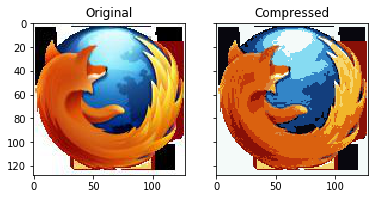

In [58]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('Original')
ax1.imshow(img2)
ax2.set_title('Compressed')
ax2.imshow(restored_img2)

**11. Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.**

In [59]:
cluster = AgglomerativeClustering(n_clusters=bird_k)
cluster.fit_predict(img2.reshape(-1, 3))

array([8, 8, 8, ..., 8, 8, 8])

In [60]:
img2_2_clusters = cluster.labels_
img2_2_centroids = move_centroids(img2.reshape(-1, 3), img2_2_clusters)

In [61]:
restored_img3 = reconstruct_image(img2_2_clusters, img2_2_centroids).reshape(128, 128, 3)

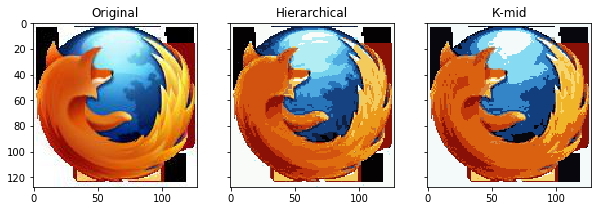

In [62]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(10, 9)
ax1.set_title('Original')
ax1.imshow(img2)
ax2.set_title('Hierarchical')
ax2.imshow(restored_img3)
ax3.set_title('К-mid')
ax3.imshow(restored_img2)

**Вывод** 

Кластеризация - задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были полее похожи друг на друга, чем на объекты из других кластеров. 

Задача кластеризации относитсфя к классу задач обучения без учителя. 

Применение кластерного анализа в общем виде сводится к следующим этапам:
Отбор выборки объектов для кластеризации.
Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости – нормализация значений переменных.
Вычисление значений меры сходства между объектами.
Применение метода кластерного анализа для создания групп сходных объектов (кластеров).
Представление результатов анализа.

После получения и анализа результатов возможна корректировка выбранной метрики и метода кластеризации до получения оптимального результата.